In [ ]:
 import torch

## COMPUTING DERIVATIVES

In [ ]:
x = torch.tensor(2.0, requires_grad = True)
y = 9*x**4 + 2*x**3 + 3*x**2 + 6*x + 1
y.backward() ## Computes the gradient
x.grad ##Substitutes to the gradient

tensor(330.)

## COMPUTING PARTIAL DERIVATIVES

In [ ]:
x = torch.tensor(2.0, requires_grad = True)
z = torch.tensor(1.0, requires_grad = True)
y = x**3 + z**2
y.backward() ## Computes the gradient


In [ ]:
print(x.grad) ##Substitutes to the gradient
print(z.grad)


tensor(12.)
tensor(2.)


## Linear regression

In [ ]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [ ]:
def forward(x):
    y = w*x + b
    return y

In [ ]:
x = torch.tensor([4, 7])
forward(x)

tensor([13., 22.], grad_fn=<AddBackward0>)

In [ ]:
from torch.nn import Linear

In [ ]:
torch.manual_seed(1)
model = Linear(in_features = 1, out_features = 1) ##Linear model with input features equals 1 and output features equals 1
print(model.bias, model.weight)##using random weights based on seed

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
##Model prediction for inputs
x = torch.tensor([[2.0],[3.3]])
model(x)

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)

Custom Linear Regression

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


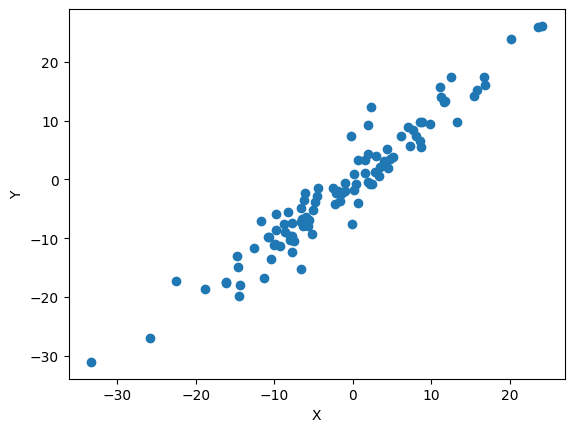

In [ ]:
X=torch.randn(100,1)*10
Y = X + 3*torch.randn(100,1)# to move the dataset from centre
plt.plot(X.numpy(), Y.numpy(), 'o')# when given o, each datapoint is mentioned as circle
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

MODEL CLASS CONSTRUCTOR

In [ ]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear= nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

MODEL INSTANTIATION

In [ ]:
torch.manual_seed(1)
model = LR(1,1)

EXTRACTING MODEL PARAMETERS

In [ ]:
[w, b] = model.parameters()
def get_params ():
  return (w[0][0].item(), b[0].item())


DEFINING PLOT FIT FUNCTION

In [ ]:
import numpy as np

In [ ]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.plot(X.numpy(), Y.numpy(), 'o')
  plt.xlabel('X')
  plt.ylabel('Y')

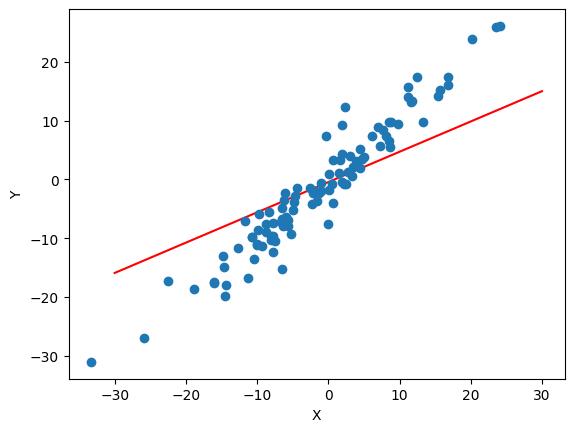

In [ ]:
plot_fit('Initial Model')

Training

Step 1 : Initialize the loss function we want to minimize and optimizer

Batch Gradient Descent -- gradient is calculated based on entire dataset, based on sum of accumulated errors.Weights are updated using this gradient

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

An epoch in machine learning is one complete pass through the entire training dataset during training.

In [ ]:
print(X, Y)

tensor([[ -6.5398],
        [-16.0948],
        [ -1.0017],
        [ -6.0919],
        [ -9.7977],
        [-16.0910],
        [-11.6603],
        [-10.7475],
        [ -7.7731],
        [ -2.5146],
        [ -2.2227],
        [ 16.8711],
        [  2.2843],
        [  4.6764],
        [ -5.7098],
        [  0.1349],
        [  6.9954],
        [  1.9908],
        [  8.6569],
        [  2.4440],
        [ -6.6291],
        [  8.0731],
        [  4.3914],
        [ 11.7120],
        [-22.4556],
        [-14.4646],
        [  0.6116],
        [ -6.1774],
        [ -7.9807],
        [ -1.3162],
        [ -7.9844],
        [  3.3573],
        [  1.5777],
        [ -7.7345],
        [  1.9906],
        [  0.4570],
        [  1.5296],
        [ -4.7568],
        [-18.8214],
        [ -7.7655],
        [ -1.5785],
        [ -0.2879],
        [ 23.5711],
        [-10.3734],
        [ 15.7480],
        [ -6.2985],
        [ 24.0698],
        [  2.7857],
        [  0.6628],
        [ -4.3704],


WHEN I USED THE LEARNING RATE TO BE 0.01, THE LOSSES WERE INCREASING
I HAD REDUCED THE LEARNING RATE TO 0.001

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, Y)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad() ## INITIALIZE THE GRADIENT TO ZERO BEFORE ACCUMULATION
  loss.backward() ## COMPUTE THE GRADIENT AND ACCUMULATE IT
  optimizer.step()### STEP WILL UPDATE THE PARAMETERS OF THE MODEL

epoch: 0 loss: 36.448326110839844
epoch: 1 loss: 25.847070693969727
epoch: 2 loss: 19.274921417236328
epoch: 3 loss: 15.200486183166504
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.10822868347168
epoch: 6 loss: 10.137072563171387
epoch: 7 loss: 9.534791946411133
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.69587516784668
epoch: 12 loss: 8.640159606933594
epoch: 13 loss: 8.605380058288574
epoch: 14 loss: 8.583581924438477
epoch: 15 loss: 8.569831848144531
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551656723022461
epoch: 19 loss: 8.549099922180176
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545924186706543
epoch: 22 loss: 8.544849395751953
epoch: 23 loss: 8.543954849243164
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.54245662689209
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.5399

PLOT THE LOSSES

In [ ]:
print(losses)

[36.448326110839844, 25.847070693969727, 19.274921417236328, 15.200486183166504, 12.674422264099121, 11.10822868347168, 10.137072563171387, 9.534791946411133, 9.161184310913086, 8.92933464050293, 8.785365104675293, 8.69587516784668, 8.640159606933594, 8.605380058288574, 8.583581924438477, 8.569831848144531, 8.56106948852539, 8.555403709411621, 8.551656723022461, 8.549099922180176, 8.547282218933105, 8.545924186706543, 8.544849395751953, 8.543954849243164, 8.543170928955078, 8.54245662689209, 8.541786193847656, 8.541145324707031, 8.540521621704102, 8.539909362792969, 8.539307594299316, 8.538711547851562, 8.538119316101074, 8.537530899047852, 8.536945343017578, 8.536364555358887, 8.535784721374512, 8.535205841064453, 8.53463363647461, 8.534061431884766, 8.533492088317871, 8.532923698425293, 8.532360076904297, 8.5317964553833, 8.531234741210938, 8.530675888061523, 8.530119895935059, 8.529565811157227, 8.529012680053711, 8.528463363647461, 8.527915000915527, 8.52737045288086, 8.52682685852

Text(0.5, 0, 'epoch')

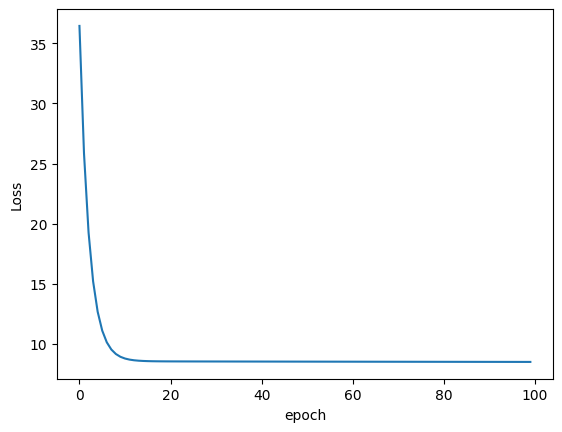

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

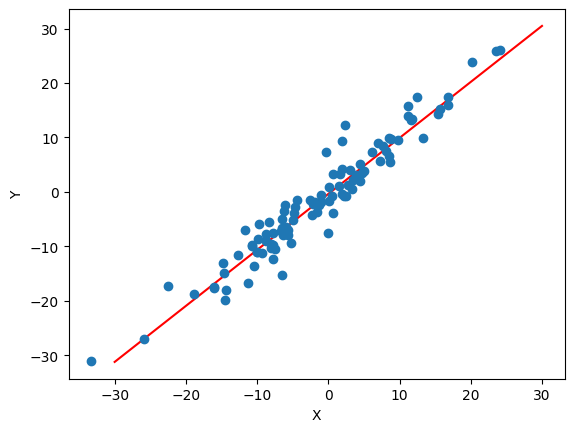

In [ ]:
plot_fit('Trained Model')